In [10]:
pip install gitpython

Note: you may need to restart the kernel to use updated packages.


In [16]:
git clone https://github.com/elyiorgos/sleeppy.git
cd sleeppy
python setup.py install

SyntaxError: invalid syntax (3506919108.py, line 1)

In [318]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
import scipy as sp
from scipy.spatial import distance
import flirt
import sklearn.metrics
from numpy import trapz
import statistics



In [909]:
project = pd.read_csv("C:/Users/srine/Downloads/2022-11-11_05-09-29/Accelerometer.csv") #(11/11)
# project = pd.read_csv("C:/Users/srine/Downloads/2022-11-12_05-14-55/Accelerometer.csv")
# project = pd.read_csv("C:/Users/srine/Downloads/2022-11-10_05-35-38/Accelerometer.csv")
# project = pd.read_csv("C:/Users/srine/Downloads/2022-12-07_07-53-41/Accelerometer.csv") #Bhavya
# project = pd.read_csv("C:/Users/srine/Downloads/2022-11-12_17-33-44/Accelerometer.csv") # Bha?vya
project

,time,seconds_elapsed,z,y,x
0,1668143369695540500,0.012541,0.143989,-0.117398,0.077824
1,1668143369705513200,0.022513,0.139179,-0.065409,0.043222
2,1668143369715485400,0.032485,0.076604,-0.028273,0.043212
3,1668143369725458400,0.042458,-0.029556,-0.018118,0.031106
4,1668143369735430100,0.052430,-0.146195,-0.000886,0.000607
...,...,...,...,...,...
2995708,1668173246823754500,29877.140754,-0.040184,-0.005897,0.004281
2995709,1668173246833726700,29877.150727,-0.037333,-0.015524,-0.004636
2995710,1668173246843698400,29877.160698,-0.040926,-0.010567,0.004949
2995711,1668173246853670700,29877.170671,-0.042270,-0.010836,-0.007631


In [910]:
project['time'] = pd.to_datetime(project['time'],unit='ns')

In [911]:
project

,time,seconds_elapsed,z,y,x
0,2022-11-11 05:09:29.695540500,0.012541,0.143989,-0.117398,0.077824
1,2022-11-11 05:09:29.705513200,0.022513,0.139179,-0.065409,0.043222
2,2022-11-11 05:09:29.715485400,0.032485,0.076604,-0.028273,0.043212
3,2022-11-11 05:09:29.725458400,0.042458,-0.029556,-0.018118,0.031106
4,2022-11-11 05:09:29.735430100,0.052430,-0.146195,-0.000886,0.000607
...,...,...,...,...,...
2995708,2022-11-11 13:27:26.823754500,29877.140754,-0.040184,-0.005897,0.004281
2995709,2022-11-11 13:27:26.833726700,29877.150727,-0.037333,-0.015524,-0.004636
2995710,2022-11-11 13:27:26.843698400,29877.160698,-0.040926,-0.010567,0.004949
2995711,2022-11-11 13:27:26.853670700,29877.170671,-0.042270,-0.010836,-0.007631


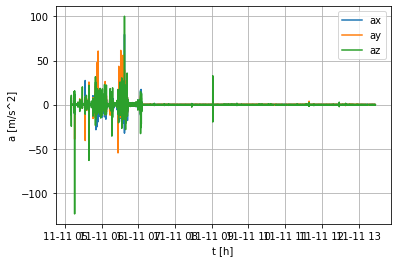

In [912]:
plt.xlabel("t [h]") # Label for x-axis
plt.ylabel("a [m/s^2]")# Label for y-axis

plt.plot(project['time'], project['x'], label="ax") # Plotting x-axis values with time with sliced values

plt.plot(project['time'], project['y'], label = "ay")# Plotting y-axis values with time with sliced value

plt.plot(project['time'], project['z'], label = "az")# Plotting z-axis values with time with sliced value

plt.grid()
plt.legend();

In [913]:
step = 30
max_value = project['seconds_elapsed'].max()
df_list = []

for i in range(0, int(max_value)+30 , step):
    df_filter = project[(project['seconds_elapsed'] >= i) & (project['seconds_elapsed'] <= i+step)]
    if(len(df_filter)) > 0:
        df_list.append(df_filter)


In [914]:
df_list[100]

,time,seconds_elapsed,z,y,x
300655,2022-11-11 05:59:29.687237000,3000.004237,-0.068234,-0.067829,0.033181
300656,2022-11-11 05:59:29.697211100,3000.014211,-0.076814,-0.085601,0.034634
300657,2022-11-11 05:59:29.707183900,3000.024184,-0.062881,-0.095541,0.030134
300658,2022-11-11 05:59:29.717156900,3000.034157,-0.078377,-0.106816,0.029044
300659,2022-11-11 05:59:29.727131000,3000.044131,-0.064857,-0.128947,0.012132
...,...,...,...,...,...
303658,2022-11-11 05:59:59.637250300,3029.954250,-0.064262,-0.068090,-0.015154
303659,2022-11-11 05:59:59.647224000,3029.964224,-0.083499,-0.064711,-0.016572
303660,2022-11-11 05:59:59.657197300,3029.974197,-0.085075,-0.073511,-0.023519
303661,2022-11-11 05:59:59.667170000,3029.984170,-0.084014,-0.086391,-0.035727


In [915]:
sleep_hour = df_list[600:770]
sleep_hour

[                                 time  seconds_elapsed         z         y  \
 1804633 2022-11-11 10:09:29.690611500     18000.007612 -0.053672 -0.005775   
 1804634 2022-11-11 10:09:29.700583200     18000.017583 -0.041498 -0.003641   
 1804635 2022-11-11 10:09:29.710555400     18000.027555 -0.043310  0.003279   
 1804636 2022-11-11 10:09:29.720527400     18000.037527 -0.024721 -0.016448   
 1804637 2022-11-11 10:09:29.730499600     18000.047500 -0.029732 -0.028509   
 ...                               ...              ...       ...       ...   
 1807636 2022-11-11 10:09:59.636241200     18029.953241 -0.047945 -0.002978   
 1807637 2022-11-11 10:09:59.646213400     18029.963213 -0.043431 -0.006035   
 1807638 2022-11-11 10:09:59.656185000     18029.973185 -0.036851 -0.014693   
 1807639 2022-11-11 10:09:59.666157300     18029.983157 -0.034571 -0.013410   
 1807640 2022-11-11 10:09:59.676129000     18029.993129 -0.051160 -0.003311   
 
                 x  
 1804633 -0.030745  
 1804634

In [916]:
#Converting to magnitude

In [917]:
sq_x_2 = np.square(project['x'])
sq_y_2 =np.square(project['y'])
sq_z_2 = np.square(project['z'])
asd_2 = np.add(sq_x_2,sq_y_2)
qwe_2 = np.add(asd_2,sq_z_2)

zxc_2 = np.sqrt(qwe_2)

In [918]:
df_list

[                              time  seconds_elapsed         z         y  \
 0    2022-11-11 05:09:29.695540500         0.012541  0.143989 -0.117398   
 1    2022-11-11 05:09:29.705513200         0.022513  0.139179 -0.065409   
 2    2022-11-11 05:09:29.715485400         0.032485  0.076604 -0.028273   
 3    2022-11-11 05:09:29.725458400         0.042458 -0.029556 -0.018118   
 4    2022-11-11 05:09:29.735430100         0.052430 -0.146195 -0.000886   
 ...                            ...              ...       ...       ...   
 3003 2022-11-11 05:09:59.643033300        29.960033  0.988488 -0.077286   
 3004 2022-11-11 05:09:59.653005000        29.970005  1.377125  0.004329   
 3005 2022-11-11 05:09:59.662978000        29.979978  1.685975  0.181034   
 3006 2022-11-11 05:09:59.672950300        29.989950  2.003120  0.283521   
 3007 2022-11-11 05:09:59.682923300        29.999923  2.448197  0.340991   
 
              x  
 0     0.077824  
 1     0.043222  
 2     0.043212  
 3     0.03110

In [922]:
df = pd.DataFrame()
for i in df_list:
    df1 = pd.DataFrame(i)
    df = pd.concat([df, df1])

In [923]:
df

,time,seconds_elapsed,z,y,x
0,2022-11-11 05:09:29.695540500,0.012541,0.143989,-0.117398,0.077824
1,2022-11-11 05:09:29.705513200,0.022513,0.139179,-0.065409,0.043222
2,2022-11-11 05:09:29.715485400,0.032485,0.076604,-0.028273,0.043212
3,2022-11-11 05:09:29.725458400,0.042458,-0.029556,-0.018118,0.031106
4,2022-11-11 05:09:29.735430100,0.052430,-0.146195,-0.000886,0.000607
...,...,...,...,...,...
2995708,2022-11-11 13:27:26.823754500,29877.140754,-0.040184,-0.005897,0.004281
2995709,2022-11-11 13:27:26.833726700,29877.150727,-0.037333,-0.015524,-0.004636
2995710,2022-11-11 13:27:26.843698400,29877.160698,-0.040926,-0.010567,0.004949
2995711,2022-11-11 13:27:26.853670700,29877.170671,-0.042270,-0.010836,-0.007631


In [924]:
df_5_6am = df.loc[(df["time"] >= '2022-11-11 10:00') & (df["time"] <= '2022-11-11 11:00')]
df_5_6am

,time,seconds_elapsed,z,y,x
1747504,2022-11-11 10:00:00.001282800,17430.318283,-0.037681,-0.008836,-0.000066
1747505,2022-11-11 10:00:00.011254500,17430.328255,-0.035409,-0.007611,0.002675
1747506,2022-11-11 10:00:00.021226800,17430.338227,-0.026215,-0.006297,0.000649
1747507,2022-11-11 10:00:00.031198500,17430.348198,-0.039498,-0.009392,-0.001334
1747508,2022-11-11 10:00:00.041170700,17430.358171,-0.041102,-0.008464,0.011517
...,...,...,...,...,...
2108509,2022-11-11 10:59:59.953734100,21030.270734,-0.049930,-0.014670,0.002868
2108510,2022-11-11 10:59:59.963706400,21030.280706,-0.040053,-0.008521,-0.004583
2108511,2022-11-11 10:59:59.973678000,21030.290678,-0.049623,0.000458,-0.000624
2108512,2022-11-11 10:59:59.983650300,21030.300650,-0.034033,-0.017470,-0.004219


In [925]:
step = 30
max_value = df_5_6am['seconds_elapsed'].max()
df_5_6am_data = []

for i in range(0, int(max_value)+30 , step):
    df_filter = df_5_6am[(df_5_6am['seconds_elapsed'] >= i) & (df_5_6am['seconds_elapsed'] <= i+step)]
    if(len(df_filter)) > 0:
        df_5_6am_data.append(df_filter)


In [926]:
df_5_6am_data

[                                 time  seconds_elapsed         z         y  \
 1747504 2022-11-11 10:00:00.001282800     17430.318283 -0.037681 -0.008836   
 1747505 2022-11-11 10:00:00.011254500     17430.328255 -0.035409 -0.007611   
 1747506 2022-11-11 10:00:00.021226800     17430.338227 -0.026215 -0.006297   
 1747507 2022-11-11 10:00:00.031198500     17430.348198 -0.039498 -0.009392   
 1747508 2022-11-11 10:00:00.041170700     17430.358171 -0.041102 -0.008464   
 ...                               ...              ...       ...       ...   
 1750476 2022-11-11 10:00:29.638284500     17459.955284 -0.043504  0.016313   
 1750477 2022-11-11 10:00:29.648256300     17459.965256 -0.051647  0.007574   
 1750478 2022-11-11 10:00:29.658228500     17459.975229 -0.041682 -0.004004   
 1750479 2022-11-11 10:00:29.668200200     17459.985200 -0.029308 -0.000394   
 1750480 2022-11-11 10:00:29.678172400     17459.995172 -0.048938 -0.005465   
 
                 x  
 1747504 -0.000066  
 1747505

In [927]:
#Selecting a time where I am asleep for sure daily, to calculate a cut-off threshold for my algorithm

df = pd.DataFrame()
for i in df:
    df1 = pd.DataFrame(i)
    df = pd.concat([df, df1])


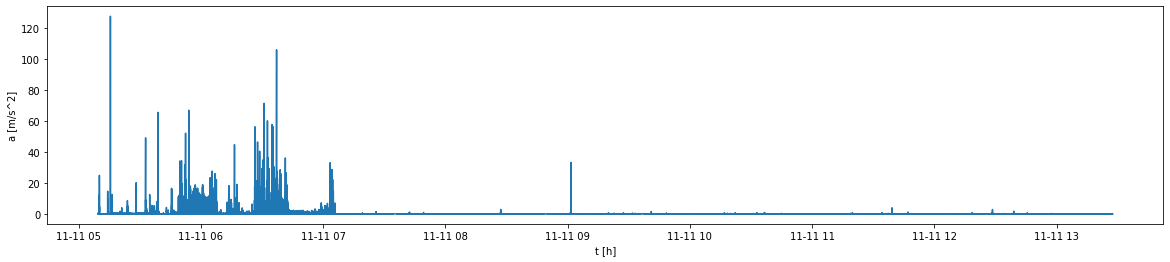

In [963]:
plt.figure(figsize=(20,4))
plt.xlabel("t [h]")

plt.ylabel("a [m/s^2]")
plt.plot(project['time'], zxc_2);

In [1031]:
# To filter my signal, Here I choose a low-pass filter, where this filter smoothens my signals and removes the short-term fluctuations leaving the longer bands.

# Design lowpass filter.
# Reference: Frequency-domain filtering using a Butterworth filter (courtesy: Prof. Deepak Ganesan)

# set sample rate to 100Hz Since I used my Iphone for the data collection process(Apple watch 50hz(fixed))
sampling_rate = 50

# calculate the Nyquist frequency
nyq = 0.5 * sampling_rate

# set order of the filter to 3
order = 3

# set cutoff frequency for lowpass filter - 3. Since the approximate number of steps were around ~ 2-3 seconds.
cutoff = 1#Hz, 

# design filter
low = cutoff / nyq
b, a = scipy.signal.butter(order, low, btype='low')
#b, a = scipy.signal.cheby1(3, 2, 100, 'low', analog=True)
# apply the lowpass filter to the data
y1 = scipy.signal.filtfilt(b, a, zxc_2)
# y1 = scipy.signal.medfilt(zxc_2, 3009)


In [1032]:
y1

array([0.20187267, 0.19293295, 0.18405742, ..., 0.03753448, 0.03753943,
       0.03754507])

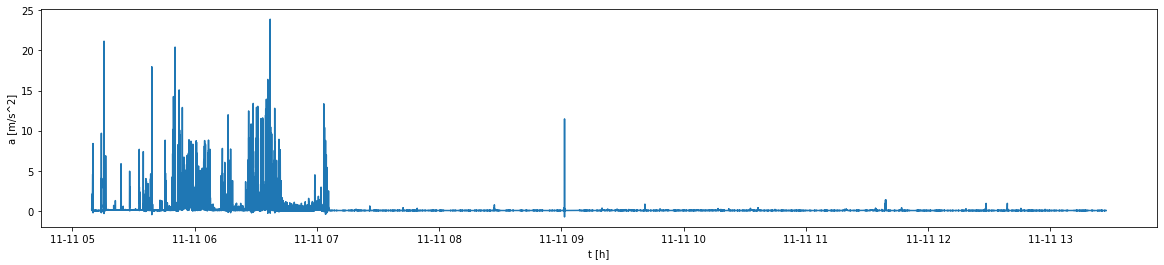

In [1033]:
plt.figure(figsize=(20,4))

plt.xlabel("t [h]")
plt.ylabel("a [m/s^2]")
plt.plot(project['time'], y1);


In [932]:
df_list

[                              time  seconds_elapsed         z         y  \
 0    2022-11-11 05:09:29.695540500         0.012541  0.143989 -0.117398   
 1    2022-11-11 05:09:29.705513200         0.022513  0.139179 -0.065409   
 2    2022-11-11 05:09:29.715485400         0.032485  0.076604 -0.028273   
 3    2022-11-11 05:09:29.725458400         0.042458 -0.029556 -0.018118   
 4    2022-11-11 05:09:29.735430100         0.052430 -0.146195 -0.000886   
 ...                            ...              ...       ...       ...   
 3003 2022-11-11 05:09:59.643033300        29.960033  0.988488 -0.077286   
 3004 2022-11-11 05:09:59.653005000        29.970005  1.377125  0.004329   
 3005 2022-11-11 05:09:59.662978000        29.979978  1.685975  0.181034   
 3006 2022-11-11 05:09:59.672950300        29.989950  2.003120  0.283521   
 3007 2022-11-11 05:09:59.682923300        29.999923  2.448197  0.340991   
 
              x  
 0     0.077824  
 1     0.043222  
 2     0.043212  
 3     0.03110

In [933]:
auc_data = []

for i in df_5_6am_data:
    df = pd.DataFrame(i)
    sq_x1 = np.square(df['x'])
    sq_y1 =np.square(df['y'])
    sq_z1 = np.square(df['z'])
    asd1 = np.add(sq_x1,sq_y1)
    qwe1 = np.add(asd1,sq_z1)

    zxc1 = np.sqrt(qwe1)
    
    sampling_rate = 50

    nyq = 0.5 * sampling_rate

    order = 3

    cutoff = 1#Hz, 

    low = cutoff / nyq
    b1, a1 = scipy.signal.butter(order, low, btype='low')

#     y3 = scipy.signal.filtfilt(b1, a1, zxc1)
    y3 = scipy.signal.medfilt(zxc1, 9)
    
    auc_value = np.trapz(y3, dx=np.diff(df['seconds_elapsed']))
    auc_data.append(auc_value)

In [934]:
auc_data

[1.3746086541569986,
 1.2897696181989677,
 1.326833931042103,
 1.3156281179506846,
 1.3166816099188576,
 1.3637009691423634,
 1.3860099935539976,
 1.4109670158042487,
 1.3164546538862034,
 1.2829597366854695,
 1.2984013755154058,
 1.2939776900983824,
 1.4667835668448532,
 1.7793174452117273,
 1.5681337312712649,
 1.436377847665423,
 1.4251617780902188,
 1.3378558227434423,
 1.3251912925752216,
 1.3859291567940464,
 1.2882996527652568,
 1.3293315481389532,
 1.3554691530758949,
 1.3542203199644156,
 1.3682129173535726,
 1.3055746672403994,
 1.3970600256432004,
 1.394334882531449,
 1.310597760114372,
 1.3562125083339867,
 1.498514935625479,
 1.4031210069851587,
 1.3196289354236963,
 2.1035751470924393,
 1.72629586066411,
 1.831842084484923,
 1.4618714060969362,
 1.236363497727744,
 1.1241486673111845,
 1.0925970134036964,
 1.1553253542361321,
 1.1270763338081058,
 1.0257775311931896,
 1.0347160272361073,
 2.132992450439148,
 1.291386444623642,
 1.3461945380725469,
 1.250255694131503,
 1.2

In [935]:
auc_data
mean_auc = np.round(statistics.mean(auc_data),2)
mean_auc

1.32

In [936]:
len(auc_data)

121

In [937]:
auc_data_final = []


for i in df_list:
    df = pd.DataFrame(i)
    sq_x = np.square(df['x'])
    sq_y =np.square(df['y'])
    sq_z = np.square(df['z'])
    asd = np.add(sq_x,sq_y)
    qwe = np.add(asd,sq_z)

    zxc = np.sqrt(qwe)
    
    sampling_rate = 50

    nyq = 0.5 * sampling_rate

    order = 3

    cutoff = 1#Hz, 

    low = cutoff / nyq
    b1, a1 = scipy.signal.butter(order, low, btype='low')

    y_1 = scipy.signal.filtfilt(b1, a1, zxc)
#     y_1 = scipy.signal.medfilt(zxc, 9)
    
    auc_value = np.trapz(y_1, dx=np.diff(df['seconds_elapsed']))
    auc_data_final.append(auc_value)
    
    
    

In [938]:
len(auc_data_final)

996

In [939]:
type(auc_data_final)

list

In [967]:
final_auc =[]
for i in auc_data_final:
    if i <= mean_auc:
       final_auc.append(i)
        

In [968]:
final_auc

[1.0668898257886945,
 1.0989064639491177,
 1.0471735595528688,
 1.0758080985595873,
 1.1047933196182393,
 1.056572197292435,
 1.1196206937299342,
 1.150233675562484,
 1.1643686477434505,
 1.3043945337043747,
 1.170871863127311,
 0.7562970178147811,
 1.2801355739363545,
 1.2692740400744502,
 1.2955714539961218,
 1.284338034722377,
 1.2810613841399296,
 1.256120628650252,
 1.2584536713878094,
 1.2641762572401647,
 1.2599409460919961,
 1.253847838817273,
 1.2512482795420903,
 1.2474634590520008,
 1.2683408075940092,
 1.2555548346450542,
 1.250773198694052,
 1.2436771725995097,
 1.2323672680692266,
 1.2491626227090684,
 1.252453924043605,
 1.277131873760839,
 1.2648228607420313,
 1.2473357724255338,
 1.2345290347740798,
 1.2387067035269541,
 1.2328772324367272,
 1.2378426725381146,
 1.279141593756922,
 1.2758575107633663,
 1.2795571445205312,
 1.2715159329982793,
 1.2520611418950502,
 1.240971921074458,
 1.2375740093553642,
 1.234517233364255,
 1.2423932848445638,
 1.2688638282384281,
 1.2

In [969]:
len(final_auc)

654

In [970]:
sleep_duration = (len(final_auc) * 30)/3600
sleep_duration

5.45

In [955]:
for i in df_list[1:2]:
    df = pd.DataFrame(i)
    print(df['time'].min())
    min_date_30segment = df['time'].min()
    df1 = pd.DataFrame([min_date_30segment,auc_value])

2022-11-11 05:09:59.692895200


In [956]:
auc_data_final = []
test = pd.DataFrame()

for i in df_list:
    df = pd.DataFrame(i)
    sq_x = np.square(df['x'])
    sq_y =np.square(df['y'])
    sq_z = np.square(df['z'])
    asd = np.add(sq_x,sq_y)
    qwe = np.add(asd,sq_z)

    zxc = np.sqrt(qwe)
    
    sampling_rate = 50

    nyq = 0.5 * sampling_rate

    order = 3

    cutoff = 1#Hz, 

    low = cutoff / nyq
    b1, a1 = scipy.signal.butter(order, low, btype='low')

    y_1 = scipy.signal.filtfilt(b1, a1, zxc)
    
    auc_value = np.trapz(y_1, dx=np.diff(df['seconds_elapsed']))
    auc_data_final.append(auc_value)
    min_date_30segment = df['time'].min()
    df1 = pd.DataFrame({'segment_min_date' :[min_date_30segment],'auc_value':[auc_value]})
    test = pd.concat([df1,test])
    

In [957]:
test["yes/no"] = test['auc_value'].apply(lambda x: 1 if x<=mean_auc else 0 )

In [958]:
test[test['auc_value']<=mean_auc]

,segment_min_date,auc_value,yes/no
0,2022-11-11 13:26:59.690473000,1.054490,1
0,2022-11-11 13:26:29.685349600,1.165885,1
0,2022-11-11 13:25:59.690195700,1.146617,1
0,2022-11-11 13:25:29.685047600,1.146690,1
0,2022-11-11 13:24:59.689889000,1.155719,1
...,...,...,...
0,2022-11-11 05:12:29.689796600,1.104793,1
0,2022-11-11 05:11:59.692801800,1.075808,1
0,2022-11-11 05:11:29.685688600,1.047174,1
0,2022-11-11 05:10:59.688348000,1.098906,1


In [959]:
test = test.sort_values(by ='segment_min_date')
test

,segment_min_date,auc_value,yes/no
0,2022-11-11 05:09:29.695540500,11.509271,0
0,2022-11-11 05:09:59.692895200,18.670741,0
0,2022-11-11 05:10:29.690740500,1.066890,1
0,2022-11-11 05:10:59.688348000,1.098906,1
0,2022-11-11 05:11:29.685688600,1.047174,1
...,...,...,...
0,2022-11-11 13:24:59.689889000,1.155719,1
0,2022-11-11 13:25:29.685047600,1.146690,1
0,2022-11-11 13:25:59.690195700,1.146617,1
0,2022-11-11 13:26:29.685349600,1.165885,1


In [962]:
for data, values in test.groupby((test['yes/no'].shift() != test['yes/no']).cumsum()):
#     print("count of sleep/no sleep - ",len(values))
#     print(values)

    if values['yes/no'].unique()[0] == 1:
        if len(values) >= 25:
            print("sleep time starts at - ",values['segment_min_date'].min())
            print("sleep time ends at - ",values['segment_min_date'].max())
#         print(values)
#         print(len(values))

sleep time starts at -  2022-11-11 07:05:59.688313600
sleep time ends at -  2022-11-11 07:18:29.684941300
sleep time starts at -  2022-11-11 07:26:29.685157400
sleep time ends at -  2022-11-11 07:39:59.684374300
sleep time starts at -  2022-11-11 07:49:29.692689400
sleep time ends at -  2022-11-11 08:25:59.692182300
sleep time starts at -  2022-11-11 08:46:29.690503700
sleep time ends at -  2022-11-11 09:00:29.683798
sleep time starts at -  2022-11-11 09:01:59.690360300
sleep time ends at -  2022-11-11 09:18:59.688305700
sleep time starts at -  2022-11-11 10:45:29.689878500
sleep time ends at -  2022-11-11 11:17:59.684992500
sleep time starts at -  2022-11-11 11:47:29.691744800
sleep time ends at -  2022-11-11 12:17:59.692115200
sleep time starts at -  2022-11-11 12:57:29.690837800
sleep time ends at -  2022-11-11 13:26:59.690473


In [965]:
mean_auc

1.32

In [1026]:
min_val, max_val = 0,1.15

In [1027]:
# deep_sleep

In [1028]:
deep =[]
for i in auc_data_final:
    if i > min_val and i <= max_val:
        deep.append(i)

In [1029]:
len(deep)*30/3600

0.3

#### Heart Rate


In [199]:
heart_data = pd.read_csv("C:/Users/srine/Downloads/2022-11-25_HR_7.2 HRS.csv")
heart_data

,date,timestamp,heart rate
0,2022-11-11 02:44:32 +0000,00:00:05,74
1,2022-11-11 02:44:33 +0000,00:00:06,75
2,2022-11-11 02:44:34 +0000,00:00:07,76
3,2022-11-11 02:44:35 +0000,00:00:08,75
4,2022-11-11 02:44:36 +0000,00:00:09,74
...,...,...,...
22536,2022-11-11 10:06:51 +0000,07:22:24,87
22537,2022-11-11 10:06:52 +0000,07:22:25,86
22538,2022-11-11 10:06:53 +0000,07:22:26,84
22539,2022-11-11 10:06:54 +0000,07:22:27,83


In [248]:
features_data = pd.read_csv("C:/Users/srine/Downloads/2022-11-25_Features_7.2 HRS.csv")
features_data


,date,timestamp,heart_rate,AVNN,SDNN,rMSSD,pNN50,LF,HF,LFHF,alpha1,artifacts_removed,steps,latitude,longitude
0,2022-11-25 02:45:27 +0000,00:01:00,72.808840,824.075758,68.608873,40.156335,21.538462,0.061850,0.061945,0.998471,1.161569,0.0,0.0,0.0,0.0
1,2022-11-25 02:46:27 +0000,00:02:00,69.322946,865.514286,50.592124,45.606856,26.086957,0.040092,0.041137,0.974587,0.793415,0.0,0.0,0.0,0.0
2,2022-11-25 02:47:27 +0000,00:03:00,67.793231,885.044118,23.625187,19.821170,0.000000,0.011306,0.021767,0.519399,1.024793,0.0,0.0,0.0,0.0
3,2022-11-25 03:01:27 +0000,00:17:00,66.865864,897.318841,48.394269,29.839371,8.823529,0.028341,0.025125,1.127986,1.362708,0.0,0.0,0.0,0.0
4,2022-11-25 03:02:27 +0000,00:18:00,67.967403,882.776119,63.217083,55.765443,40.909091,0.052388,0.051919,1.009031,0.710804,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,2022-11-25 10:02:27 +0000,07:18:00,82.102916,730.790123,133.284262,24.588770,6.250000,0.057125,0.034440,1.658644,1.610634,0.0,0.0,0.0,0.0
371,2022-11-25 10:03:27 +0000,07:19:00,66.497164,902.294118,52.383630,31.937439,13.432836,0.023769,0.030639,0.775782,1.131092,0.0,0.0,0.0,0.0
372,2022-11-25 10:04:27 +0000,07:20:00,77.384342,775.350649,55.245804,25.658267,3.947368,0.043555,0.019298,2.256987,1.594182,0.0,0.0,0.0,0.0
373,2022-11-25 10:05:27 +0000,07:21:00,72.443393,828.232877,34.356016,21.154029,0.000000,0.027353,0.012957,2.111117,1.322886,0.0,0.0,0.0,0.0


In [264]:
features_data_1 = features_data.iloc[:, [0,1,2,7,8,9]].copy()
features_data_1

,date,timestamp,heart_rate,LF,HF,LFHF
0,2022-11-25 02:45:27 +0000,00:01:00,72.808840,0.061850,0.061945,0.998471
1,2022-11-25 02:46:27 +0000,00:02:00,69.322946,0.040092,0.041137,0.974587
2,2022-11-25 02:47:27 +0000,00:03:00,67.793231,0.011306,0.021767,0.519399
3,2022-11-25 03:01:27 +0000,00:17:00,66.865864,0.028341,0.025125,1.127986
4,2022-11-25 03:02:27 +0000,00:18:00,67.967403,0.052388,0.051919,1.009031
...,...,...,...,...,...,...
370,2022-11-25 10:02:27 +0000,07:18:00,82.102916,0.057125,0.034440,1.658644
371,2022-11-25 10:03:27 +0000,07:19:00,66.497164,0.023769,0.030639,0.775782
372,2022-11-25 10:04:27 +0000,07:20:00,77.384342,0.043555,0.019298,2.256987
373,2022-11-25 10:05:27 +0000,07:21:00,72.443393,0.027353,0.012957,2.111117


In [285]:
list(features_data_1.columns)

['date', ' timestamp', ' heart_rate', ' LF', ' HF', ' LFHF']

<AxesSubplot:xlabel=' timestamp'>

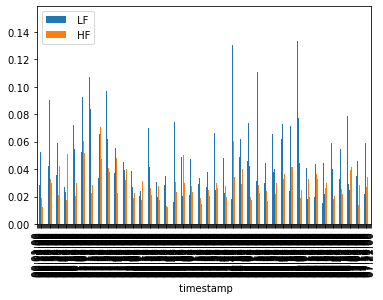

In [289]:
features_data_1.plot.bar(x = ' timestamp', y = [' LF', ' HF'])

In [301]:
features_data

,date,timestamp,heart_rate,AVNN,SDNN,rMSSD,pNN50,LF,HF,LFHF,alpha1,artifacts_removed,steps,latitude,longitude
0,2022-11-25 02:45:27 +0000,00:01:00,72.808840,824.075758,68.608873,40.156335,21.538462,0.061850,0.061945,0.998471,1.161569,0.0,0.0,0.0,0.0
1,2022-11-25 02:46:27 +0000,00:02:00,69.322946,865.514286,50.592124,45.606856,26.086957,0.040092,0.041137,0.974587,0.793415,0.0,0.0,0.0,0.0
2,2022-11-25 02:47:27 +0000,00:03:00,67.793231,885.044118,23.625187,19.821170,0.000000,0.011306,0.021767,0.519399,1.024793,0.0,0.0,0.0,0.0
3,2022-11-25 03:01:27 +0000,00:17:00,66.865864,897.318841,48.394269,29.839371,8.823529,0.028341,0.025125,1.127986,1.362708,0.0,0.0,0.0,0.0
4,2022-11-25 03:02:27 +0000,00:18:00,67.967403,882.776119,63.217083,55.765443,40.909091,0.052388,0.051919,1.009031,0.710804,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,2022-11-25 10:02:27 +0000,07:18:00,82.102916,730.790123,133.284262,24.588770,6.250000,0.057125,0.034440,1.658644,1.610634,0.0,0.0,0.0,0.0
371,2022-11-25 10:03:27 +0000,07:19:00,66.497164,902.294118,52.383630,31.937439,13.432836,0.023769,0.030639,0.775782,1.131092,0.0,0.0,0.0,0.0
372,2022-11-25 10:04:27 +0000,07:20:00,77.384342,775.350649,55.245804,25.658267,3.947368,0.043555,0.019298,2.256987,1.594182,0.0,0.0,0.0,0.0
373,2022-11-25 10:05:27 +0000,07:21:00,72.443393,828.232877,34.356016,21.154029,0.000000,0.027353,0.012957,2.111117,1.322886,0.0,0.0,0.0,0.0


In [312]:
heartrate = features_data.set_index("date")
heartrate.drop(columns = [' timestamp'], inplace = True)
clusteringinput = heartrate.to_numpy()

In [293]:
!pip install minisom

  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9021 sha256=6d719693c70a9acf50f67b4890291e316a0d3392693cef53a69140f029ba6baa
  Stored in directory: c:\users\srine\appdata\local\pip\cache\wheels\7e\47\6d\97ad48be13d8b0fc231b7df226a3d6645820c32559822a826c
Successfully built minisom


In [294]:
from minisom import MiniSom

In [ ]:
som_x = som_y = math.ceil(math.sqrt(math.sqrt(len(features_data['date']))))


som = MiniSom(som_x, som_y,len(mySeries[0]), sigma=0.3, learning_rate = 0.1)

som.random_weights_init(mySeries)
som.train(mySeries, 50000)

In [314]:
!pip install dtaidistance

In [315]:
from dtaidistance.clustering import kmeans
model4 = kmeans.KMeans(k=3)
cluster_idx, performed_it = model4.fit(clusteringinput)

numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject


{}
92.17693065073372


 50%|█████     | 5/10 [00:08<00:08,  1.63s/it]
